**Analysis of model output**


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [13]:
def load_csv_files(root_dir):
    dataframes = {}
    model_list = ["gemma2latest", "gemma227b", "llama3latest", "mistral-nemolatest", "mixtral8x7b", "phi3medium"]
    for model_folder in model_list:
        folder_path = os.path.join(root_dir, model_folder)
        if os.path.isdir(folder_path):
            csv_path = os.path.join(folder_path, "answers.csv")
            print(csv_path)
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path, sep='§', names=['row', 'question', 'answer'])
                dataframes[model_folder] = df
    return dataframes

def analyze_dataframes(dataframes):
    for model, df in dataframes.items():
        print(f"\nAnalysis for model: {model}")
        print(f"Total rows: {len(df)}")
        
        # Average answer length
        df['answer_length'] = df['answer'].str.len()
        avg_length = df['answer_length'].mean()
        print(f"Average answer length: {avg_length:.2f} characters")
        print(f"I cannot make diagnosis count:{len([df['answer'].str.contains('it is difficult to make')])}")
        # Most common words in answers
        all_words = ' '.join(df['answer']).lower().split()
        word_freq = Counter(all_words)
        print("Top 5 most common words in answers:")
        for word, count in word_freq.most_common(5):
            print(f"  {word}: {count}")
        
        # Plot answer length distribution
        plt.figure(figsize=(10, 5))
        plt.hist(df['answer_length'], bins=20)
        plt.title(f"Answer Length Distribution - {model}")
        plt.xlabel("Answer Length (characters)")
        plt.ylabel("Frequency")

In [4]:
root_directory = "output"
dataframes = load_csv_files(root_directory)

output\gemma2latest\answers.csv
output\gemma227b\answers.csv
output\llama3latest\answers.csv
output\mistral-nemolatest\answers.csv
output\mixtral8x7b\answers.csv
output\phi3medium\answers.csv


C:\Users\david\AppData\Local\Temp\ipykernel_31604\4100474747.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§', names=['row', 'question', 'answer'])
C:\Users\david\AppData\Local\Temp\ipykernel_31604\4100474747.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv_path, sep='§', names=['row', 'question', 'answer'])
C:\Users\david\AppData\Local\Temp\ipykernel_31604\4100474747.py:10: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine

In [5]:
dataframes["gemma2latest"]

,row,question,answer
0,row,quesion,answer
1,1,make a diagnosis from the context: oh my gosh,"I cannot make a diagnosis based on ""oh my gosh..."
2,2,make a diagnosis from the context: trouble sle...,The context describes Recurrent depressive dis...
3,3,"make a diagnosis from the context: All wrong, ...","Based on the provided context, the diagnosis i..."
4,4,make a diagnosis from the context: I've shifte...,"Based on the provided context, the individual ..."
5,5,make a diagnosis from the context: I'm restles...,"Based on the context, it is difficult to make ..."
6,6,make a diagnosis from the context: every break...,"Based on the context provided, the individual ..."
7,7,make a diagnosis from the context: I feel scar...,"Based on the provided context, I cannot make a..."
8,8,make a diagnosis from the context: Have you ev...,The context does not provide information about...
9,9,make a diagnosis from the context: I haven't s...,"Based on the context provided, I cannot give a..."



Analysis for model: gemma2latest
Total rows: 21
Average answer length: 265.57 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  the: 49
  a: 36
  on: 26
  based: 20
  and: 19

Analysis for model: gemma227b
Total rows: 6
Average answer length: 220.00 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  the: 12
  a: 9
  is: 7
  based: 6
  on: 6

Analysis for model: llama3latest
Total rows: 21
Average answer length: 314.90 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  the: 59
  a: 26
  of: 24
  to: 23
  on: 20

Analysis for model: mistral-nemolatest
Total rows: 21
Average answer length: 247.33 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  the: 41
  a: 21
  and: 18
  based: 14
  on: 14

Analysis for model: mixtral8x7b
Total rows: 3
Average answer length: 277.33 characters
I cannot make diagnosis count:1
Top 5 most common words in answers:
  the: 7
  to: 5
  of: 

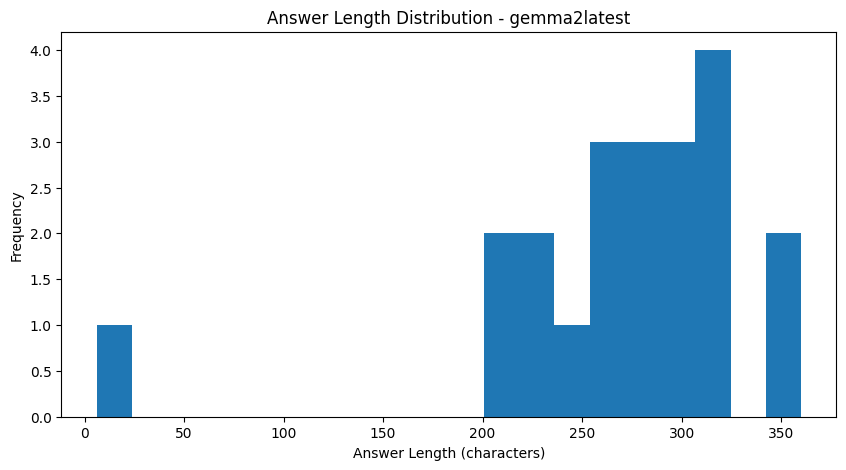

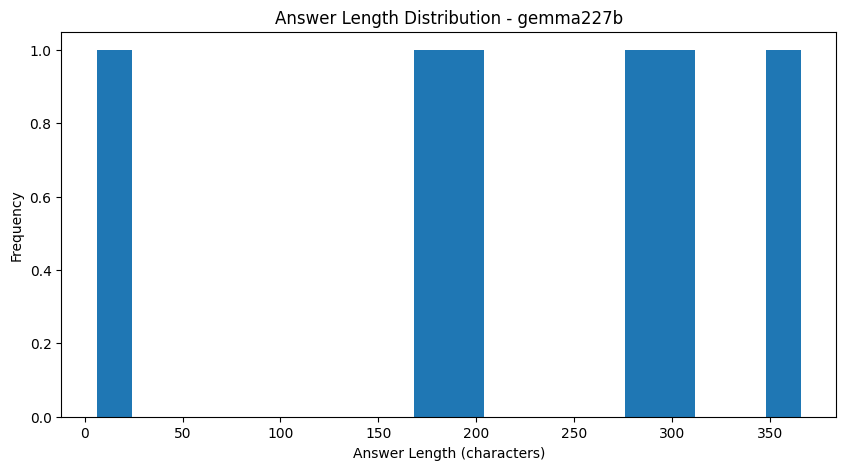

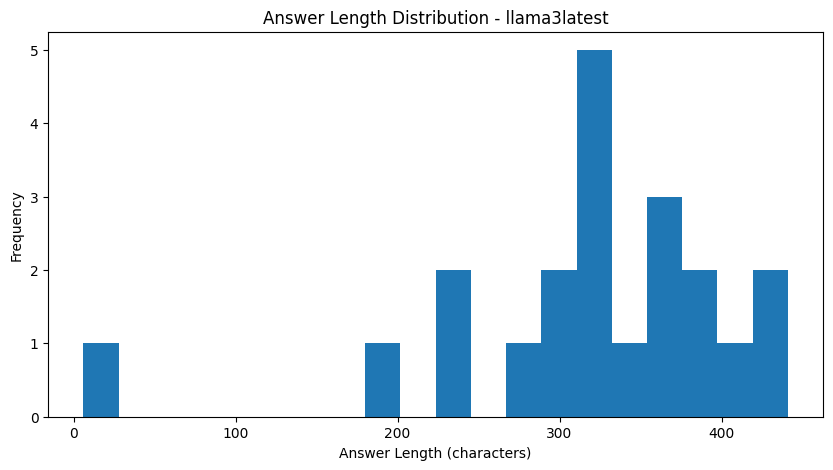

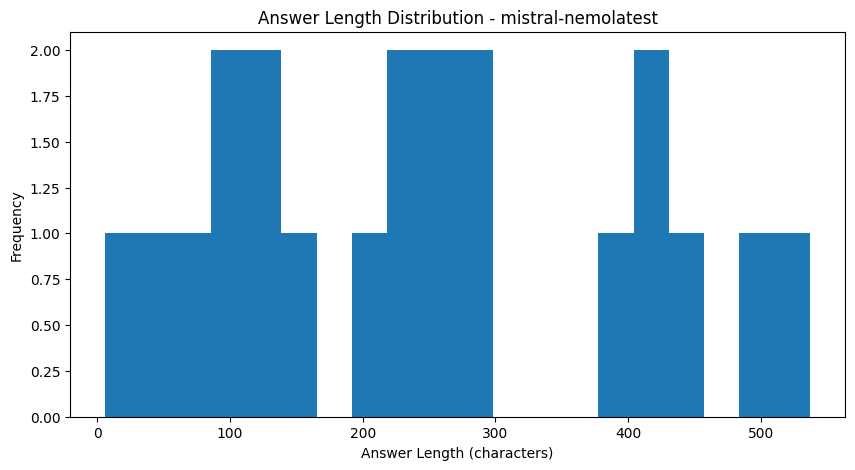

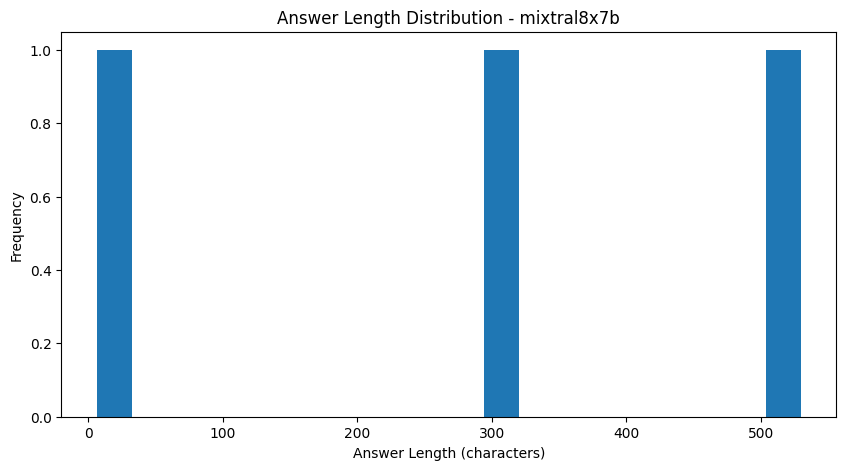

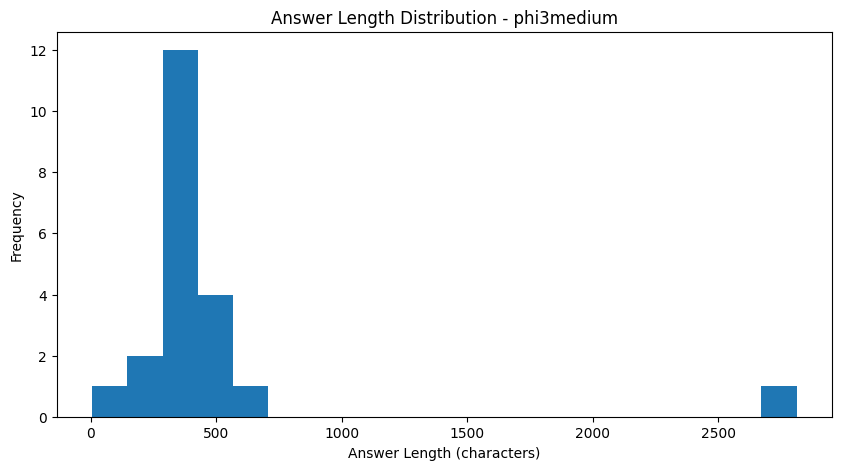

In [14]:
analyze_dataframes(dataframes)